# 원문 - 생성요약문 데이터쌍 구축
- 데이터 전처리, 종결어미 전환을 거쳤습니다.
- 훈련 데이터 추출
    - condition_2 & condition_3 & condition_4
    - 원문 길이(형태소 개수) 90 이상
    - 원문-생성요약문 길이(형태소 개수) 차이 0 이상
    - 모든 평가점수 3점 이상
- 총 25만 7천여개의 데이터입니다.
    - 훈련 데이터(train) : (149310, 2)
    - 검증 데이터(validation) : (63990, 2)
    - 테스트 데이터(test) : (43788, 2)

In [1]:
%%time

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')


import os
import csv
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


file_name = os.getenv('HOME')+'/aiffel/aeumgil/AIhub/data/aihub_ori_abs.csv'
df = pd.read_csv(file_name)

CPU times: user 57.6 s, sys: 6.44 s, total: 1min 4s
Wall time: 1min 9s


In [2]:
print(df.shape)
df.head()

(266616, 34)


,original_text,ori_char_cnt,ori_pos,only_ori_pos,ori_morph_cnt,ori_EC,ori_EF,ori_SF,ori_NNG,ori_NNP,...,abs_MAG,abs_MAJ,readable,accurate,informative,trustworthy,title,media_sub_type,size,de_ori2abs_morph
0,전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제를...,927,"[('전라남도', 'NNP'), ('가', 'JKS'), ('쌀', 'NNG'), ...","['NNP', 'JKS', 'NNG', 'NNG', 'NNG', 'JKO', 'NN...",419,"['위해', '벼', '으면', '해', '나', '해', '해야', '도와', '...","['다', '다', '다', '다', '된다', '다', '다', '된다', '한다...","['.', '.', '.', '.', '.', '.', '.', '.', '.', ...","['쌀', '과잉', '문제', '근본', '해결', '올해', '시행', '쌀',...","['전라남도', '전남', '전남', '최향', '전라남도']",...,[],[],4,3,3,3,"논 타작물 재배, 2월 말까지 신청하세요",지역지,small,338
1,여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛의...,764,"[('여수시', 'NNP'), ('는', 'JX'), ('원', 'NNG'), ('...","['NNP', 'JX', 'NNG', 'NNG', 'NNG', 'JKB', 'NNG...",339,"['며', '면', '따라', '면', '어', '통해', '고', '해', '고'...","['다', '다', '다', '다', '다', '다', '다', '다', '다', ...","['.', '.', '.', '.', '.', '.', '.', '.', '.', ...","['원', '도심', '일대', '추진', '컬러', '빌리지', '사업', '지난...",['여수시'],...,['알록달록'],[],4,4,5,4,"여수시, 컬러빌리지 마무리...‘색채와 빛’도시 완성",지역지,small,278
2,전남드래곤즈(사장 신승재)는 지난 4일 구봉산 해맞이 행사를 통해 새해 각오를 다졌...,1066,"[('전남', 'NNP'), ('드래곤즈', 'NNP'), ('(', 'SSO'),...","['NNP', 'NNP', 'SSO', 'NNG', 'NNP', 'SSC', 'JX...",454,"['통해', '올라', '며', '면서', '며', '위해', '어', '자', '...","['다', '다', '다', '다', '다', '다', '다', '다', '다', ...","['.', '.', '.', '.', '.', '.', '.', '.', '.', ...","['사장', '해맞이', '행사', '새해', '각오', '임직원', '선수단', ...","['전남', '드래곤즈', '신승재', '구봉산', '구봉산', '전남', '드래곤...",...,[],[],4,4,4,4,“새해 정기 받고 올해는 반드시 일내자!”,지역지,medium,425
3,광양시는 오는 11일부터 24일까지 농업인교육관과 읍면동 회의실에서 농업인 1050...,746,"[('광양시', 'NNP'), ('는', 'JX'), ('오', 'VV'), ('는...","['NNP', 'JX', 'VV', 'ETM', 'SN', 'NNBC', 'JX',...",325,"['면', '어려워짐', '따라', '고', '위해', '어', '도록', '고',...","['한다', '다', '다룬다', '진다', '다', '다', '다', '된다']","['.', '.', '.', '.', '.', '.', '.', '.']","['농업', '인교', '육관', '읍', '회의실', '농업', '대상', '새해...","['광양시', '다래', '이정헌', '전남', '광양시', '농업기술센터']",...,[],[],4,4,5,4,"농업인 역량 강화, 새해 실용교육 실시",지역지,small,290
4,타이완의 크루즈관광객 4000여명이 올해 두 차례에 걸쳐 여수에 입항한다. 전라남도...,978,"[('타이완', 'NNP'), ('의', 'JKG'), ('크루즈', 'NNP'),...","['NNP', 'JKG', 'NNP', 'NNG', 'SN', 'XSN', 'NNB...",402,"['걸쳐', '고', '해', '한다고', '위해', '따라', '해', '해', ...","['한다', '다', '다', '다', '한다', '다', '다', '다', '다'...","['.', '.', '.', '.', '.', '.', '.', '.', '.', ...","['관광객', '올해', '차례', '입항', '올해', '선사', '스타', '급...","['타이완', '크루즈', '여수', '전라남도', '홍콩', '크루즈', '크루즈...",...,[],[],4,4,4,4,타이완 크루즈관광객 4천여명‘전남’온다,지역지,small,370


In [3]:
df.columns

Index(['original_text', 'ori_char_cnt', 'ori_pos', 'only_ori_pos',
       'ori_morph_cnt', 'ori_EC', 'ori_EF', 'ori_SF', 'ori_NNG', 'ori_NNP',
       'ori_SN', 'ori_MAG', 'ori_MAJ', 'converted_abs', 'abs_char_cnt',
       'abs_pos', 'only_abs_pos', 'abs_morph_cnt', 'abs_EC', 'abs_EF',
       'abs_SF', 'abs_NNG', 'abs_NNP', 'abs_SN', 'abs_MAG', 'abs_MAJ',
       'readable', 'accurate', 'informative', 'trustworthy', 'title',
       'media_sub_type', 'size', 'de_ori2abs_morph'],
      dtype='object')

In [4]:
def show_data(df, step=1000 , threshold=5 ):
    cnt = 0
    for i in range(1, df.shape[0], step):
        print("{}번째 원문의 길이:{}\n{}\n\n{}번째 생성요약의 길이:{}\n{}\n\n"\
              .format(i, df['ori_morph_cnt'][i], df['original_text'][i],\
                      i, df['abs_morph_cnt'][i], df['converted_abs'][i]))
        
        if cnt > threshold: break 
        cnt += 1
            
show_data(df)

1번째 원문의 길이:339
여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛의 도시를 완성했다. 시에 따르면 총 사업비 8억원이 투입된 컬러빌리지 사업은 낮에는 색채, 밤에는 빛 을 주제로 지난해 초 착공에 들어갔다. 컬러빌리지는 색채를 이용한 경관개선사업으로 사업완료에 따라 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었다. 특히 자산마을 주택 70여 동은 동백꽃 색으로 새 단장을 마쳤다. 마을 옆을 지나는 해상케이블카에서 내려다보면 동백꽃 한 송이가 피어있는 모습으로 SNS 등을 통해 입소문을 타고 있다. 고소천사벽화마을 주택 130여 동도 지붕은 동백꽃 색, 벽면은 파스텔 톤 색상으로 변신해 이국적인 분위기를 내고 있다. 마을 내 옹벽과 비탈면은 패턴벽화와 야간조명이 설치돼 포토존으로 인기를 끌고 있다. 컬러빌리지 사업은 추진 전반에 마을 주민이 적극 참여했다는 점에서 좋은 평가를 받고 있다. 시는 사업대상이 사유시설인 만큼 계획단계부터 주민들의 의견을 들었다. 사업 시행과 준공 과정에서도 주민들의 참여를 유도해 민관이 함께 만들어가는 경관사업의 좋은 사례를 만들었다. 시 관계자는"컬러빌리지 사업은 주민들의 적극적인 관심과 참여가 만들어낸 값진 성과물"이라며"돌산공원, 해상케이블카, 남산공원, 돌산대교 등에서 빛과 색채로 물들어가는 여수의 낭만을 만끽하시기 바란다"고 말했다.

1번째 생성요약의 길이:61
여수시는 컬러빌리지 사업에 8억원을 투입하여 색채와 빛 도시를 완성하여 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었고 사업 시행과 준공 과정에서도 주민들의 참여를 유도해 경관사업의 좋은 사례를 만들었어요.


1001번째 원문의 길이:438
2019 책 읽어주는 문화봉사단 이 지난 26일, 백운노인복지센터를 끝으로 상반기 현장 활동을 마무리했다. 책 읽어주는 문화봉사단은 50대 이상의 문화봉사 활동가가 지역 내 사회적 돌봄이 필요한 기관을 방문해 소외계층에게 책을 읽어주는 사업으로, 지난 3월 한국출판문화산

## 통계분석

In [5]:
df.describe()

,ori_char_cnt,ori_morph_cnt,abs_char_cnt,abs_morph_cnt,readable,accurate,informative,trustworthy,de_ori2abs_morph
count,266616.000000,266616.000000,266616.000000,266616.000000,266616.000000,266616.000000,266616.000000,266616.000000,266616.000000
mean,1066.677788,466.419000,129.089312,61.669056,3.723629,3.761323,3.547897,3.771495,404.749944
std,302.561532,141.452082,35.922675,17.138064,0.892048,0.848068,0.918481,0.853660,141.792167
min,700.000000,7.000000,10.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-84.000000
25%,821.000000,355.000000,104.000000,50.000000,3.000000,3.000000,3.000000,3.000000,295.000000
50%,988.000000,432.000000,125.000000,60.000000,4.000000,4.000000,4.000000,4.000000,370.000000
75%,1245.000000,549.000000,151.000000,72.000000,4.000000,4.000000,4.000000,4.000000,488.000000
max,2000.000000,1032.000000,715.000000,325.000000,5.000000,5.000000,5.000000,5.000000,973.000000


In [6]:
#- 원문-생성요약문 길이차가 0이하인 경우, 22개

tmp = df[df['de_ori2abs_morph'] <= 0][['original_text','converted_abs','ori_morph_cnt','abs_morph_cnt']]
print(tmp.shape)
tmp.describe()

(22, 4)


,ori_morph_cnt,abs_morph_cnt
count,22.000000,22.000000
mean,30.909091,70.363636
std,19.242584,18.808674
min,7.000000,38.000000
25%,14.000000,56.750000
50%,26.500000,67.000000
75%,45.500000,83.750000
max,71.000000,108.000000


In [7]:
#- 원문-생성요약문 길이차가 0이하인 경우 사례

tmp.reset_index(inplace=True)

for i in range(3): 
    print('{}번째 원문:{}\n'.format(i+1,tmp['original_text'][i]))
    print('{}번째 추출요약문:{}'.format(i+1,tmp['converted_abs'][i]))
    print('-'*70)

1번째 원문:걸그룹 블랙핑크가 미국 시카고 콘서트에서 역대급 떼창을 이끌어 내며 팬들과 하나가 됐다. 지난 24일(현지시간) 블랙핑크는 미국 일리노이주 로즈먼트에 위치한 올스테이트 아레나에서 BLACKPINK 2019 WORLD TOUR with KIA CHICAGO .

1번째 추출요약문:지난 24일 블랙핑크는 미국 일리노이주 로즈먼트에 위치한 올스테이트 아레나에서 BLACKPINK 2019 WORLD TOUR with KIA CHICAGO 를 열었으며 신곡 KILL THIS LOVE 와 데뷔곡 붐바야 무대에서는 역대급 떼창을 이끌어 내며 팬들과 함께 호흡했어요.
----------------------------------------------------------------------
2번째 원문:와 월동 병해충 발생밀도를 낮추기 위해서는 철저한 방제가 필요하다"며 "노동력, 시간 비용을 크게 절감시킬 수 있는 석회유황합제를 많이 사용할 것"을 당부했다.

2번째 추출요약문:16일 충주시농기센터는 저렴하면서 병해충 방제효과가 큰 친환경 석회유황합제를 매년 20만 리터이상 공급해 농가경영비 절감효과와 사과 농가에 적화작업 용도로 사용하며 '일석이조'의 효과를 내고 있어요.
----------------------------------------------------------------------
3번째 원문:'의 첫 지역인 서울 콘서트는 오는 1월 22일(화) 오후 8시에 예매가 시작된다.

3번째 추출요약문:본격적인 솔로 활동 이후 활발한 행보를 이어가고 있는 가수 선미가, 첫 월드 투어 '2019 선미 THE 1ST WORLD TOUR '를 통해 전 세계 팬들을 만날 계획이며, 첫 서울 공연의 예매는 1월 22일(화) 오후 8시에 시작해요.
----------------------------------------------------------------------


<AxesSubplot:>

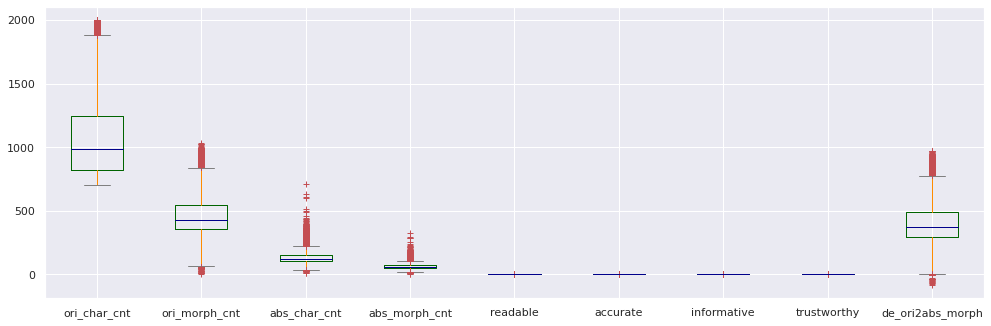

In [8]:
#- 박스플롯 (정성적 이상치 탐색)

sns.set(rc = {'figure.figsize':(15,5)})
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
df.boxplot(color=color, sym='r+')

In [9]:
import numpy as np

def find_outlier_by_Tukey(data):
    '''
    사분위 범위(IQR, interquartile range)를 기반으로 하는 Tukey Fences.
    '''
    q1, q3 = np.percentile(data, [25, 75])
    
    iqr = q3 - q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    mask = np.where((data > upper_bound) | (data < lower_bound))
    
    return lower_bound, upper_bound, mask

# def find_outlier_z(data):
#     '''
#     z-score(표준점수)를 이용하면 데이터의 평균값은 0, 표준편차가 1이 됨.
#     이때, z-score의 값이 3보다 크거나 -3보다 작은 것은 이상치라고 판단.
#     '''
#     threshold = 3
#     mean = np.mean(data)
#     std = np.std(data)
    
#     z_score = [(y - mean) / std for y in data]
    
#     masks = np.where(np.abs(z_score) > threshold)
    
#     return masks

In [10]:
#- 원문-생성요약문의 문장길이(음운 및 형태소 단위) IQR 이상치 추출

lst = ['ori_char_cnt','ori_morph_cnt','abs_char_cnt','abs_morph_cnt','de_ori2abs_morph']
masks = []

for i in lst:
    lb, ub, mask = find_outlier_by_Tukey(df[i])
    masks += mask[0].tolist()
    print(f'{i}의 이상치 (상한, 하한) : ({ub},{lb})\n')
    globals()['{}_outlier'.format(i)]= df.iloc[mask]

masks = list(set(masks))


ori_char_cnt의 이상치 (상한, 하한) : (1881.0,185.0)

ori_morph_cnt의 이상치 (상한, 하한) : (840.0,64.0)

abs_char_cnt의 이상치 (상한, 하한) : (221.5,33.5)

abs_morph_cnt의 이상치 (상한, 하한) : (105.0,17.0)

de_ori2abs_morph의 이상치 (상한, 하한) : (777.5,5.5)



In [ ]:
# #- z-score 이상치 (1411개)
# df.iloc[find_outlier_z(df['de_ori2abs_morph'])].describe()

In [11]:
#- 이상치 제거 후 26만 6천개 -> 25만 7천 개
df.drop(masks, inplace=True)
print(df.shape)

(257088, 34)


<AxesSubplot:>

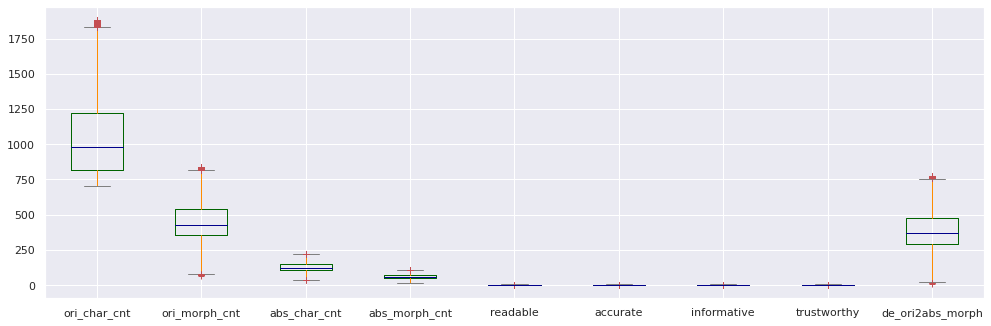

In [12]:
#- 이상치 제거 이후 박스플롯

sns.set(rc = {'figure.figsize':(15,5)})
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
df.boxplot(color=color, sym='r+')

In [13]:
condition_1 = (df['ori_morph_cnt'] <= 512) #- 원문 길이(형태소 개수) 512 이상인 경우 제외
condition_2 = (df['ori_morph_cnt'] >= 200) #- 원문 길이(형태소 개수) 200 이하인 경우 제외
condition_3 = (df['ori_morph_cnt'] >= 90) #- 원문 길이(형태소 개수) 90 이하인 경우 제외
condition_4 = (df['de_ori2abs_morph'] > 0) #- 원문-생성요약문 길이차가 0이하인 경우 제외
condition_5 = (df['readable'] >= 3) & (df['accurate'] >= 3) & (df['informative'] >= 3) & (df['trustworthy'] >= 3)


In [14]:
#- condition_1
#- 원문 길이(형태소 개수) 512이하 (kobart-sum 입력 문장길이) ,18만개

print(df[condition_1].shape)
df[condition_1].describe()

(180254, 34)


,ori_char_cnt,ori_morph_cnt,abs_char_cnt,abs_morph_cnt,readable,accurate,informative,trustworthy,de_ori2abs_morph
count,180254.000000,180254.000000,180254.000000,180254.000000,180254.000000,180254.000000,180254.000000,180254.000000,180254.000000
mean,897.403436,386.311322,127.041891,60.570417,3.771295,3.786257,3.522185,3.788315,325.740905
std,140.504624,64.221444,33.001052,15.695642,0.875863,0.840094,0.919169,0.847441,65.606249
min,700.000000,67.000000,34.000000,17.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,778.000000,336.000000,103.000000,49.000000,3.000000,3.000000,3.000000,3.000000,276.000000
50%,876.000000,380.000000,124.000000,59.000000,4.000000,4.000000,3.000000,4.000000,320.000000
75%,1000.000000,437.000000,149.000000,71.000000,4.000000,4.000000,4.000000,4.000000,376.000000
max,1880.000000,512.000000,221.000000,105.000000,5.000000,5.000000,5.000000,5.000000,490.000000


In [15]:
#- condition_2
#- 원문 길이(형태소 개수) 200 이상, 25만 6천개

print(df[condition_2].shape)
df[condition_2].describe()

(256829, 34)


,ori_char_cnt,ori_morph_cnt,abs_char_cnt,abs_morph_cnt,readable,accurate,informative,trustworthy,de_ori2abs_morph
count,256829.000000,256829.000000,256829.000000,256829.000000,256829.000000,256829.000000,256829.000000,256829.000000,256829.000000
mean,1048.022361,457.938052,127.512454,60.899466,3.729318,3.763749,3.545433,3.773363,397.038586
std,278.896376,129.601020,33.155269,15.796220,0.888489,0.845768,0.916710,0.851572,129.891857
min,700.000000,200.000000,34.000000,17.000000,0.000000,0.000000,0.000000,0.000000,107.000000
25%,817.000000,354.000000,104.000000,50.000000,3.000000,3.000000,3.000000,3.000000,294.000000
50%,979.000000,428.000000,125.000000,60.000000,4.000000,4.000000,4.000000,4.000000,367.000000
75%,1222.000000,539.000000,150.000000,71.000000,4.000000,4.000000,4.000000,4.000000,479.000000
max,1881.000000,840.000000,221.000000,105.000000,5.000000,5.000000,5.000000,5.000000,777.000000


In [16]:
#- condition_3
#- 원문 길이(형태소 개수) 90 이상, 25만 7천개

print(df[condition_3].shape)
df[condition_2].describe()

(257070, 34)


,ori_char_cnt,ori_morph_cnt,abs_char_cnt,abs_morph_cnt,readable,accurate,informative,trustworthy,de_ori2abs_morph
count,256829.000000,256829.000000,256829.000000,256829.000000,256829.000000,256829.000000,256829.000000,256829.000000,256829.000000
mean,1048.022361,457.938052,127.512454,60.899466,3.729318,3.763749,3.545433,3.773363,397.038586
std,278.896376,129.601020,33.155269,15.796220,0.888489,0.845768,0.916710,0.851572,129.891857
min,700.000000,200.000000,34.000000,17.000000,0.000000,0.000000,0.000000,0.000000,107.000000
25%,817.000000,354.000000,104.000000,50.000000,3.000000,3.000000,3.000000,3.000000,294.000000
50%,979.000000,428.000000,125.000000,60.000000,4.000000,4.000000,4.000000,4.000000,367.000000
75%,1222.000000,539.000000,150.000000,71.000000,4.000000,4.000000,4.000000,4.000000,479.000000
max,1881.000000,840.000000,221.000000,105.000000,5.000000,5.000000,5.000000,5.000000,777.000000


In [17]:
#- condition_4
#- 원문-생성요약문 길이(형태소 개수) 차이 0 이상, 25만 7천개

print(df[condition_4].shape)
df[condition_4].describe()

(257088, 34)


,ori_char_cnt,ori_morph_cnt,abs_char_cnt,abs_morph_cnt,readable,accurate,informative,trustworthy,de_ori2abs_morph
count,257088.000000,257088.00000,257088.000000,257088.000000,257088.000000,257088.000000,257088.000000,257088.000000,257088.000000
mean,1047.914632,457.63115,127.496985,60.891936,3.729303,3.763746,3.545222,3.773226,396.739214
std,278.896210,129.90098,33.154416,15.795915,0.888595,0.845869,0.916836,0.851715,130.173583
min,700.000000,67.00000,34.000000,17.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,817.000000,354.00000,104.000000,49.000000,3.000000,3.000000,3.000000,3.000000,294.000000
50%,979.000000,428.00000,125.000000,60.000000,4.000000,4.000000,4.000000,4.000000,367.000000
75%,1222.000000,539.00000,150.000000,71.000000,4.000000,4.000000,4.000000,4.000000,479.000000
max,1881.000000,840.00000,221.000000,105.000000,5.000000,5.000000,5.000000,5.000000,777.000000


In [19]:
#- condition_1 & condition_4
#- 원문 길이(형태소 개수) 512이하 (kobart-sum 입력 문장길이)
#- 원문-생성요약문 길이(형태소 개수) 차이 0 이상
#- 18만 개

print(df[condition_1 & condition_4].shape)
df[condition_1 & condition_4].describe()

(180254, 34)


,ori_char_cnt,ori_morph_cnt,abs_char_cnt,abs_morph_cnt,readable,accurate,informative,trustworthy,de_ori2abs_morph
count,180254.000000,180254.000000,180254.000000,180254.000000,180254.000000,180254.000000,180254.000000,180254.000000,180254.000000
mean,897.403436,386.311322,127.041891,60.570417,3.771295,3.786257,3.522185,3.788315,325.740905
std,140.504624,64.221444,33.001052,15.695642,0.875863,0.840094,0.919169,0.847441,65.606249
min,700.000000,67.000000,34.000000,17.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,778.000000,336.000000,103.000000,49.000000,3.000000,3.000000,3.000000,3.000000,276.000000
50%,876.000000,380.000000,124.000000,59.000000,4.000000,4.000000,3.000000,4.000000,320.000000
75%,1000.000000,437.000000,149.000000,71.000000,4.000000,4.000000,4.000000,4.000000,376.000000
max,1880.000000,512.000000,221.000000,105.000000,5.000000,5.000000,5.000000,5.000000,490.000000


In [20]:
#- condition_2 & condition_4
#- 원문 길이(형태소 개수) 200 이상
#- 원문-생성요약문 길이(형태소 개수) 차이 0 이상
#- 25만 6천 개   

print(df[condition_2 & condition_4].shape)
df[condition_2 & condition_4].describe()

(256829, 34)


,ori_char_cnt,ori_morph_cnt,abs_char_cnt,abs_morph_cnt,readable,accurate,informative,trustworthy,de_ori2abs_morph
count,256829.000000,256829.000000,256829.000000,256829.000000,256829.000000,256829.000000,256829.000000,256829.000000,256829.000000
mean,1048.022361,457.938052,127.512454,60.899466,3.729318,3.763749,3.545433,3.773363,397.038586
std,278.896376,129.601020,33.155269,15.796220,0.888489,0.845768,0.916710,0.851572,129.891857
min,700.000000,200.000000,34.000000,17.000000,0.000000,0.000000,0.000000,0.000000,107.000000
25%,817.000000,354.000000,104.000000,50.000000,3.000000,3.000000,3.000000,3.000000,294.000000
50%,979.000000,428.000000,125.000000,60.000000,4.000000,4.000000,4.000000,4.000000,367.000000
75%,1222.000000,539.000000,150.000000,71.000000,4.000000,4.000000,4.000000,4.000000,479.000000
max,1881.000000,840.000000,221.000000,105.000000,5.000000,5.000000,5.000000,5.000000,777.000000


In [21]:
#- condition_3 & condition_4
#- 원문 길이(형태소 개수) 90 이상
#- 원문-생성요약문 길이(형태소 개수) 차이 0 이상
#- 25만 7천 개   

print(df[condition_3 & condition_4].shape)
df[condition_3 & condition_4].describe()

(257070, 34)


,ori_char_cnt,ori_morph_cnt,abs_char_cnt,abs_morph_cnt,readable,accurate,informative,trustworthy,de_ori2abs_morph
count,257070.000000,257070.000000,257070.000000,257070.000000,257070.000000,257070.000000,257070.000000,257070.000000,257070.000000
mean,1047.918898,457.657735,127.498751,60.892804,3.729268,3.763730,3.545221,3.773217,396.764932
std,278.898664,129.866655,33.154358,15.795834,0.888580,0.845832,0.916791,0.851677,130.141801
min,700.000000,90.000000,34.000000,17.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,817.000000,354.000000,104.000000,49.000000,3.000000,3.000000,3.000000,3.000000,294.000000
50%,979.000000,428.000000,125.000000,60.000000,4.000000,4.000000,4.000000,4.000000,367.000000
75%,1222.000000,539.000000,150.000000,71.000000,4.000000,4.000000,4.000000,4.000000,479.000000
max,1881.000000,840.000000,221.000000,105.000000,5.000000,5.000000,5.000000,5.000000,777.000000


In [22]:
#- condition_1 & condition_2 & condition_4
#- 원문 길이(형태소 개수) 512이하 (kobart-sum 입력 문장길이)
#- 원문 길이(형태소 개수) 200 이상
#- 원문-생성요약문 길이(형태소 개수) 차이 0 이상
#- 18만 개  

print(df[condition_1 & condition_2 & condition_4].shape)
df[condition_1 & condition_2 & condition_4].describe()

(179995, 34)


,ori_char_cnt,ori_morph_cnt,abs_char_cnt,abs_morph_cnt,readable,accurate,informative,trustworthy,de_ori2abs_morph
count,179995.000000,179995.000000,179995.000000,179995.000000,179995.000000,179995.000000,179995.000000,179995.000000,179995.000000
mean,897.340576,386.646607,127.063307,60.580699,3.771377,3.786294,3.522453,3.788533,326.065907
std,140.256376,63.640758,33.002352,15.696151,0.875689,0.839940,0.919000,0.847225,65.075899
min,700.000000,200.000000,34.000000,17.000000,0.000000,0.000000,0.000000,0.000000,107.000000
25%,778.000000,336.000000,103.000000,49.000000,3.000000,3.000000,3.000000,3.000000,276.000000
50%,876.000000,381.000000,124.000000,59.000000,4.000000,4.000000,3.000000,4.000000,320.000000
75%,1000.000000,437.000000,149.000000,71.000000,4.000000,4.000000,4.000000,4.000000,376.000000
max,1880.000000,512.000000,221.000000,105.000000,5.000000,5.000000,5.000000,5.000000,490.000000


In [23]:
#- condition_1 & condition_3 & condition_4
#- 원문 길이(형태소 개수) 512이하 (kobart-sum 입력 문장길이)
#- 원문 길이(형태소 개수) 90 이상
#- 원문-생성요약문 길이(형태소 개수) 차이 0 이상
#- 18만 개  

print(df[condition_1 & condition_3 & condition_4].shape)
df[condition_1 & condition_3 & condition_4].describe()

(180236, 34)


,ori_char_cnt,ori_morph_cnt,abs_char_cnt,abs_morph_cnt,readable,accurate,informative,trustworthy,de_ori2abs_morph
count,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000
mean,897.394488,386.342118,127.044364,60.571623,3.771250,3.786236,3.522182,3.788305,325.770495
std,140.489409,64.150633,33.000989,15.695542,0.875841,0.840041,0.919105,0.847385,65.542524
min,700.000000,90.000000,34.000000,17.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,778.000000,336.000000,103.000000,49.000000,3.000000,3.000000,3.000000,3.000000,276.000000
50%,876.000000,380.000000,124.000000,59.000000,4.000000,4.000000,3.000000,4.000000,320.000000
75%,1000.000000,437.000000,149.000000,71.000000,4.000000,4.000000,4.000000,4.000000,376.000000
max,1880.000000,512.000000,221.000000,105.000000,5.000000,5.000000,5.000000,5.000000,490.000000


In [25]:
#- condition_2 & condition_4 & condition_5
#- 원문 길이(형태소 개수) 200 이상
#- 원문-생성요약문 길이(형태소 개수) 차이 0 이상
#- 모든 평가점수 3점 이상
#- 21만 3천개  

print(df[condition_2 & condition_4 & condition_5].shape)
df[condition_2 & condition_4 & condition_5].describe()

(213300, 34)


,ori_char_cnt,ori_morph_cnt,abs_char_cnt,abs_morph_cnt,readable,accurate,informative,trustworthy,de_ori2abs_morph
count,213300.000000,213300.000000,213300.000000,213300.000000,213300.000000,213300.000000,213300.000000,213300.000000,213300.000000
mean,1045.687947,456.892203,127.774046,60.997876,3.915574,3.926526,3.768331,3.934233,395.894327
std,277.310085,128.683505,32.888345,15.667958,0.719966,0.717633,0.738448,0.725931,128.999810
min,700.000000,200.000000,34.000000,17.000000,3.000000,3.000000,3.000000,3.000000,107.000000
25%,817.000000,354.000000,104.000000,50.000000,3.000000,3.000000,3.000000,3.000000,294.000000
50%,977.000000,427.000000,125.000000,60.000000,4.000000,4.000000,4.000000,4.000000,366.000000
75%,1218.000000,537.000000,150.000000,71.000000,4.000000,4.000000,4.000000,4.000000,477.000000
max,1881.000000,840.000000,221.000000,105.000000,5.000000,5.000000,5.000000,5.000000,777.000000


In [27]:
#- condition_3 & condition_4 & condition_5
#- 원문 길이(형태소 개수) 90 이상
#- 원문-생성요약문 길이(형태소 개수) 차이 0 이상
#- 모든 평가점수 3점 이상
#- 21만 3천 개  

print(df[condition_3 & condition_4 & condition_5].shape)
df[condition_4 & condition_5 & condition_5].describe()

(213484, 34)


,ori_char_cnt,ori_morph_cnt,abs_char_cnt,abs_morph_cnt,readable,accurate,informative,trustworthy,de_ori2abs_morph
count,213497.000000,213497.000000,213497.000000,213497.000000,213497.000000,213497.000000,213497.000000,213497.00000,213497.000000
mean,1045.574359,456.613372,127.759439,60.990899,3.915596,3.926589,3.768287,3.93421,395.622472
std,277.301973,128.955881,32.887354,15.667415,0.719989,0.717655,0.738425,0.72594,129.255191
min,700.000000,67.000000,34.000000,17.000000,3.000000,3.000000,3.000000,3.00000,8.000000
25%,817.000000,354.000000,104.000000,50.000000,3.000000,3.000000,3.000000,3.00000,294.000000
50%,976.000000,426.000000,125.000000,60.000000,4.000000,4.000000,4.000000,4.00000,366.000000
75%,1218.000000,537.000000,150.000000,71.000000,4.000000,4.000000,4.000000,4.00000,476.000000
max,1881.000000,840.000000,221.000000,105.000000,5.000000,5.000000,5.000000,5.00000,777.000000


In [28]:
#- condition_1 & condition_2 & condition_4 & condition_5
#- 원문 길이(형태소 개수) 512이하 (kobart-sum 입력 문장길이)
#- 원문 길이(형태소 개수) 200 이상
#- 원문-생성요약문 길이(형태소 개수) 차이 0 이상
#- 모든 평가점수 3점 이상
#- 15만 개  

print(df[condition_1 & condition_2 & condition_4 & condition_5].shape)
df[condition_1 & condition_2 & condition_4 & condition_5].describe()


(150354, 34)


,ori_char_cnt,ori_morph_cnt,abs_char_cnt,abs_morph_cnt,readable,accurate,informative,trustworthy,de_ori2abs_morph
count,150354.00000,150354.000000,150354.000000,150354.000000,150354.000000,150354.000000,150354.000000,150354.000000,150354.000000
mean,897.34899,386.816413,127.352801,60.696623,3.939104,3.937787,3.750742,3.941299,326.119791
std,139.79992,63.313461,32.743381,15.570770,0.722478,0.719081,0.738598,0.727283,64.743964
min,700.00000,200.000000,34.000000,17.000000,3.000000,3.000000,3.000000,3.000000,107.000000
25%,779.00000,336.000000,104.000000,49.000000,3.000000,3.000000,3.000000,3.000000,276.000000
50%,876.00000,381.000000,125.000000,59.000000,4.000000,4.000000,4.000000,4.000000,320.000000
75%,999.00000,437.000000,149.000000,71.000000,4.000000,4.000000,4.000000,4.000000,376.000000
max,1870.00000,512.000000,221.000000,105.000000,5.000000,5.000000,5.000000,5.000000,490.000000


In [29]:
df.rename(columns={'original_text':'original','converted_abs':'abs'}, inplace=True)

In [30]:
#- condition_2 & condition_4 & condition_5
#- 21만 3천개
condition = condition_2 & condition_4 & condition_5
train = df[condition][['original','abs']]
print(train.shape)

#- not(condition_2 & condition_4 & condition_5)
#- 4만 3천개
test = df[~condition][['original','abs']]
print(test.shape)

(213300, 2)
(43788, 2)


In [31]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train, test_size=0.3)

In [32]:
print(train.shape)
print(val.shape)
print(test.shape)

(149310, 2)
(63990, 2)
(43788, 2)


In [33]:
# train.to_csv('train_v3_ori_abs.csv',index=False)
# val.to_csv('val_v3_ori_abs.csv',index=False)
# test.to_csv('test_v3_ori_abs.csv',index=False)